In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
print(df.shape)
print(df.info())

(48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 no

In [3]:
# Hence, we see that there are 16 columns and 48895 rows
# Missing values are there in columns: name, host_name, last_review, reviews_per_month. 
# ID, name and host_name column has no affect on Price. Hence can be removed
df1 = df.drop(['id', 'name', 'host_name'],axis=1)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 4.8+ MB
None


In [4]:
# now we have null values in last_review and reviews_per_month
df1.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
# number of null values in last_review and reviews_per_months is same. hence there seems to be a relation. However, we cannot imput 
# last_review but we can for reviews_per_month
df1.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
df1.loc[df1['reviews_per_month'].isnull(),'reviews_per_month']=0
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 4.8+ MB


In [7]:
# remove last_review as we have dealt with reviews_per_month by imputing missing values with 0
df1 = df1.drop(['last_review','number_of_reviews','reviews_per_month'],axis = 1)
df1.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0


In [8]:
# analyse the statistics of price group by neighbourhood. we observe there is minimum price as 0
df1.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [9]:
# analyse the statistics of minimum nights group by neighbourhood
df1.groupby('neighbourhood_group')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,4.560953,15.631792,1.0,1.0,2.0,3.0,365.0
Brooklyn,20104.0,6.056556,17.632726,1.0,2.0,3.0,5.0,999.0
Manhattan,21661.0,8.579151,24.050857,1.0,1.0,3.0,6.0,1250.0
Queens,5666.0,5.181433,15.028725,1.0,1.0,2.0,3.0,500.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


In [10]:
# As price cannot be 0 and minimum nights cannot be more than 365; hence we remove these rows
df1 = df1[df1['price']>0]
df1 = df1[df1['minimum_nights']<=365]
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48870 entries, 0 to 48894
Data columns (total 10 columns):
host_id                           48870 non-null int64
neighbourhood_group               48870 non-null object
neighbourhood                     48870 non-null object
latitude                          48870 non-null float64
longitude                         48870 non-null float64
room_type                         48870 non-null object
price                             48870 non-null int64
minimum_nights                    48870 non-null int64
calculated_host_listings_count    48870 non-null int64
availability_365                  48870 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 4.1+ MB


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0


In [11]:
# analyse the statistics of availability_365 as per neighbourhood
df1.groupby('neighbourhood_group')['availability_365'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,165.794495,135.304079,0.0,37.0,148.0,313.75,365.0
Brooklyn,20089.0,100.159739,126.243695,0.0,0.0,28.0,188.00,365.0
Manhattan,21654.0,111.929667,132.641048,0.0,0.0,36.0,230.00,365.0
Queens,5664.0,144.422493,135.528910,0.0,2.0,98.0,286.00,365.0
Staten Island,373.0,199.678284,131.852000,0.0,78.0,219.0,333.00,365.0


In [12]:
# now data is ready for prediction. Calculate pairwise correlation matrix to see how 
#different variables are related to price
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,host_id,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365
host_id,1,0.02,0.13,0.015,-0.019,0.15,0.2
latitude,0.02,1,0.085,0.034,0.03,0.02,-0.011
longitude,0.13,0.085,1,-0.15,-0.074,-0.11,0.083
price,0.015,0.034,-0.15,1,0.054,0.057,0.082
minimum_nights,-0.019,0.03,-0.074,0.054,1,0.16,0.16
calculated_host_listings_count,0.15,0.02,-0.11,0.057,0.16,1,0.23
availability_365,0.2,-0.011,0.083,0.082,0.16,0.23,1


In [13]:
# one hot encoding for categorical variables using get dummies
df1 = pd.get_dummies(df1,prefix_sep='_', drop_first=True)
df1.head()




,host_id,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,2787,40.64749,-73.97237,149,1,6,365,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2845,40.75362,-73.98377,225,1,2,355,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4632,40.80902,-73.94190,150,3,1,365,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,4869,40.68514,-73.95976,89,1,1,194,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7192,40.79851,-73.94399,80,10,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# VIF calculation
# pd.DataFrame(np.linalg.inv(df1.corr().values), index = corr.index, columns=corr.columns)

pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)



,host_id,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365
host_id,1.079908,-0.010803,-0.135845,-0.016332,0.066532,-0.150881,-0.184297
latitude,-0.010803,1.012547,-0.101129,-0.048780,-0.036865,-0.029597,0.038337
longitude,-0.135845,-0.101129,1.083526,0.165534,0.066871,0.154750,-0.122737
price,-0.016332,-0.048780,0.165534,1.036088,-0.025482,-0.012922,-0.088642
minimum_nights,0.066532,-0.036865,0.066871,-0.025482,1.056928,-0.134835,-0.160841
calculated_host_listings_count,-0.150881,-0.029597,0.154750,-0.012922,-0.134835,1.111727,-0.210283
availability_365,-0.184297,0.038337,-0.122737,-0.088642,-0.160841,-0.210283,1.129333


In [15]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df1.drop('price', axis=1)
print(X.head())

Price = df1['price']
#Features_train, Features_test, Price_train, Price_test = train_test_split(Features, Price, test_size=0.30, random_state=42)
X_train, X_test, Price_train, Price_test = train_test_split(X, Price, test_size=0.3, random_state=42)

   host_id  latitude  longitude  minimum_nights  \
0     2787  40.64749  -73.97237               1   
1     2845  40.75362  -73.98377               1   
2     4632  40.80902  -73.94190               3   
3     4869  40.68514  -73.95976               1   
4     7192  40.79851  -73.94399              10   

   calculated_host_listings_count  availability_365  \
0                               6               365   
1                               2               355   
2                               1               365   
3                               1               194   
4                               1                 0   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                             1                              0   
1                             0                              1   
2                             0                              1   
3                             1                              0   
4                             0 

In [16]:
print("X", X.shape)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X (48870, 232)
X_train: (34209, 232)
X_test: (14661, 232)


In [17]:
from sklearn.linear_model import LinearRegression

print("\nLINEAR (subset)")
rgr = LinearRegression(normalize=True)
rgr.fit(X_train, Price_train)
print("model:", rgr)
print("coeffs:", rgr.coef_)
print("intercept:", rgr.intercept_)

#Evaluate the predictions of the model
Price_predictions_regression = rgr.predict(X_test)
print('R squared:', rgr.score(X_test, Price_test))
print(Price_predictions_regression[:10])
print(Price_test[:10])

Price_predictions_regression




LINEAR (subset)
model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
coeffs: [ 9.54802438e-08  5.85329665e+00 -9.49288623e+02 -1.44707526e-01
 -1.92318719e-01  1.74318495e-01  1.67688675e+14  1.73699225e+14
 -7.01869716e+14  4.88055562e+14 -4.88055562e+14 -4.88055562e+14
  7.01869716e+14  7.01869716e+14 -1.67688675e+14 -1.73699225e+14
 -1.67688675e+14  7.01869716e+14 -4.88055562e+14 -3.40019880e+01
  7.01869716e+14  7.01869716e+14 -1.67688675e+14  7.01869716e+14
  7.01869716e+14 -5.39276755e+00 -1.67688675e+14 -1.67688675e+14
 -1.67688675e+14 -1.67688675e+14  7.01869716e+14  7.01869716e+14
 -1.67688675e+14 -4.44412762e+01 -1.67688675e+14 -1.67688675e+14
 -4.88055562e+14 -1.67688675e+14  7.01869716e+14 -1.67688675e+14
 -1.67688675e+14 -2.32721935e+01 -4.88055562e+14 -1.73699225e+14
 -1.73699225e+14  2.31433497e+02 -1.73699225e+14 -4.20224129e+01
  1.28491541e+01 -4.88055562e+14 -1.67688675e+14  4.55006650e+01
 -1.67688675e+14  7.01869716e+14 -1.67688675

array([122.07988288, 224.43826323, 326.75076323, ..., 271.28201323,
        44.86113288, 264.00076323])

In [18]:
print("\n\nRIDGE")
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.001, normalize=True)
ridge.fit(X_train, Price_train)
print("model:", ridge)
print("ridge coeffs:", ridge.coef_)
print("ridge intercept:", ridge.intercept_)
Price_predictions = ridge.predict(X_test)
print('Ridge R squared:', ridge.score(X_test, Price_test))
print(Price_predictions_regression[:10])
print(Price_test[:10])




RIDGE
model: Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)
ridge coeffs: [ 9.50995785e-08  2.07068136e+01 -8.95174346e+02 -1.45024428e-01
 -1.85318344e-01  1.74811702e-01 -1.84091099e+01  3.02169874e+00
  6.36402408e+00 -9.81622570e+01 -2.19215042e+02 -6.47444743e+01
  1.20048312e+02 -2.71153564e+01 -1.17234563e+02  5.21658174e+01
 -5.70744195e+01  1.01935689e+02 -1.60997213e+02 -2.21569011e+01
  1.64172695e+02  9.09051715e+01 -1.33876712e+01  1.89948874e+02
  1.33111399e+02 -6.26409723e+00 -9.96788891e+01 -3.28768437e+01
 -7.35444266e+00 -9.58831443e+01  1.57573561e+02  6.71105636e+01
 -6.05978823e+01 -3.98769875e+01  1.52431144e+01 -1.49685824e+01
 -1.69994430e+02 -1.94928898e+00  1.21458535e+02 -1.16176472e+01
 -2.48614669e+01 -2.31871923e+01 -1.13509585e+02  2.85726800e+01
 -3.97585959e+01  2.23375444e+02 -2.17322914e+01 -3.32582429e+01
  1.91711348e+01 -1.06534899e+02  2.31006959e+01  3.75170

In [19]:
print("\n\nLASSO")
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001, normalize=True)
lasso.fit(X_train, Price_train)
print(lasso)
print("Lasso coeffs:", lasso.coef_)
print("Lasso intercept:", lasso.intercept_)
Price_predictions = lasso.predict(X_test)
print('Lasso R squared:', lasso.score(X_test, Price_test))
print(Price_predictions[:10])
print(Price_test[:10])



LASSO
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso coeffs: [ 9.04497002e-08 -0.00000000e+00 -5.16533072e+02 -1.28901891e-01
 -1.67305500e-01  1.72141077e-01 -0.00000000e+00  4.14028132e+01
  4.40613338e+00 -1.25899082e+02 -5.65818397e+01  3.09426964e+01
  8.89187438e+01 -1.91949642e+00 -7.48502002e+01  6.57821823e+01
 -1.24689215e+01  5.64658520e+01 -8.45012925e+00 -9.34643541e+00
  1.25080367e+02  4.30281616e+01 -3.34381492e+00  1.58404752e+02
  7.34115669e+01  0.00000000e+00 -6.61666036e+01 -2.49151433e+01
  1.58594012e+01 -6.21831700e+01  1.39686628e+02  4.46295225e+01
 -4.04421760e+01 -2.68955619e+01  4.20346620e+01 -1.03227702e+01
 -1.01650213e+01  0.00000000e+00  6.73806856e+01 -1.37730617e+01
  2.92191048e+00 -1.30245557e+01  0.00000000e+00  3.97425095e+01
 -2.72424913e+01  1.85960742e+02 -2.52277526e+00 -6.09645179e+00


In [20]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from math import sqrt



In [21]:
pipelines = {
    "rf": make_pipeline(StandardScaler(), ensemble.RandomForestRegressor(random_state=123)),
    "gb": make_pipeline(StandardScaler(), ensemble.GradientBoostingRegressor(random_state=123))
}




In [22]:
rf_hyperparameters = {
    "randomforestregressor__n_estimators": [100, 200],
    "randomforestregressor__max_features": ["auto", "sqrt", 0.33]
}
gb_hyperparameters = {
    "gradientboostingregressor__n_estimators": [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}
hyperparameters = {"rf": rf_hyperparameters,
                   "gb": gb_hyperparameters}


In [23]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv= 10, n_jobs= -1, verbose= 10)
    model.fit(X_train, Price_train)
    fitted_models[name] = model
    print(name, 'has been fitted.')


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 21.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 21.2min finished


rf has been fitted.
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 39

gb has been fitted.


In [24]:
 for name, model in fitted_models.items():
    print(name)
    print("-----------")
    pred = model.predict(X_test)
    #print('MAE:', mean_absolute_error(Price_test, pred))
    print("MSE:", "\n", mean_squared_error(Price_test, pred))
    error = sqrt(mean_squared_error(Price_test,pred)) #calculate rmse
    
    print('RMSE value = ', error)

rf
-----------
MSE: 
 58766.08472540603
RMSE value =  242.41717085513153
gb
-----------
MSE: 
 60575.82518796507
RMSE value =  246.1215658733811


In [25]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)



In [26]:
#import required packages
from sklearn import neighbors
#from math import sqrt
%matplotlib inline

In [27]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Price_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Price_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)


RMSE value for k=  1 is: 276.0626010821712
RMSE value for k=  2 is: 266.82365416903804
RMSE value for k=  3 is: 261.92832802499737
RMSE value for k=  4 is: 258.1252012367355
RMSE value for k=  5 is: 255.87599723575903
RMSE value for k=  6 is: 255.23208884681077
RMSE value for k=  7 is: 254.2922387652192
RMSE value for k=  8 is: 254.2187930874535
RMSE value for k=  9 is: 254.04074424856915
RMSE value for k=  10 is: 253.41046467105863
RMSE value for k=  11 is: 252.76696152829783
RMSE value for k=  12 is: 252.37957517406855
RMSE value for k=  13 is: 252.16742097040282
RMSE value for k=  14 is: 252.00906685535597
RMSE value for k=  15 is: 251.92735402289472
RMSE value for k=  16 is: 251.69887900985466
RMSE value for k=  17 is: 251.55158375499002
RMSE value for k=  18 is: 251.2809759866691
RMSE value for k=  19 is: 251.14590776215496
RMSE value for k=  20 is: 250.88169946250784


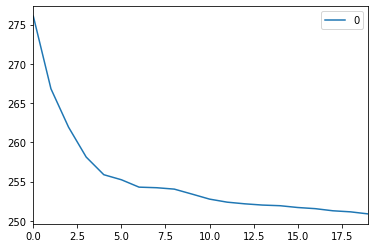

In [28]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
